# Analysis of life expectancy in Austria for the year 2019
https://github.com/thomashon/mortality-austria

This Notebook follows [Ben Fry's basic Data Visualization Process](https://www.dashingd3js.com/the-data-visualization-process):

1. Acquire
2. Parse
3. Filter (dataset is already pre-filtered)
4. Mine
5. Represent
6. Refine (this notebook contains the final version, see the GitHub commits for the full history)
7. Interact

## 1. Acquire
### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv('mortality-austria-2.csv')
df.head()

,region,gender,current_age,mortality_probability,alive_peers,die_this_year,years_to_live,stationary_current_age,stationary
0,burgenland,m,0,0.004371,100000.000000,437.062937,79.020671,99608.391608,7.902067e+06
1,burgenland,m,1,0.000790,99562.937063,78.667012,78.367101,99523.603557,7.802459e+06
2,burgenland,m,2,0.000000,99484.270051,0.000000,77.428674,99484.270051,7.702935e+06
3,burgenland,m,3,0.000000,99484.270051,0.000000,76.428674,99484.270051,7.603451e+06
4,burgenland,m,4,0.000000,99484.270051,0.000000,75.428674,99484.270051,7.503967e+06


## 2. Parse
### Droping unneccessary columns

In [3]:
df.drop(['die_this_year', 'stationary_current_age', 'stationary'], axis=1, inplace=True)
df.head()

,region,gender,current_age,mortality_probability,alive_peers,years_to_live
0,burgenland,m,0,0.004371,100000.000000,79.020671
1,burgenland,m,1,0.000790,99562.937063,78.367101
2,burgenland,m,2,0.000000,99484.270051,77.428674
3,burgenland,m,3,0.000000,99484.270051,76.428674
4,burgenland,m,4,0.000000,99484.270051,75.428674


### Transforming *alive_peers* to percentual basis 1

In [4]:
df.alive_peers = df.alive_peers / 100000
df.head()

,region,gender,current_age,mortality_probability,alive_peers,years_to_live
0,burgenland,m,0,0.004371,1.000000,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101
2,burgenland,m,2,0.000000,0.994843,77.428674
3,burgenland,m,3,0.000000,0.994843,76.428674
4,burgenland,m,4,0.000000,0.994843,75.428674


### Renaming columns

In [5]:
df.rename({'mortality_probability': 'mortality_this_year'}, axis=1, inplace=True)
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live
0,burgenland,m,0,0.004371,1.000000,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101
2,burgenland,m,2,0.000000,0.994843,77.428674
3,burgenland,m,3,0.000000,0.994843,76.428674
4,burgenland,m,4,0.000000,0.994843,75.428674


### Generating new column *mortality_dist*

In [6]:
df['mortality_dist'] = df.mortality_this_year * df.alive_peers
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000


### Generating new column *dead_peers*

In [7]:
df['dead_peers'] = 1 - df.alive_peers
df.head()

### Generating new column (life-)*expectancy*

In [8]:
df['expectancy'] = df.current_age + df.years_to_live
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,expectancy
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787,79.367101
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000,79.428674
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000,79.428674
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000,79.428674


### Transforming *region* and *gender* to category

In [9]:
df.region = df.region.astype('category')
df.gender = df.gender.astype('category')
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,expectancy
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787,79.367101
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000,79.428674
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000,79.428674
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000,79.428674


## 4. Mine

In [29]:
df.describe()

,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,expectancy
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000
mean,50.000000,0.042165,0.815263,35.839879,0.009813,85.839879
std,29.162781,0.089848,0.289981,25.090530,0.013919,5.427070
min,0.000000,0.000000,0.006073,1.753247,0.000000,78.184678
25%,25.000000,0.000365,0.772572,12.304824,0.000362,81.424540
50%,50.000000,0.002268,0.972625,33.129373,0.002214,84.914248
75%,75.000000,0.025071,0.993478,57.541099,0.014719,87.878470
max,100.000000,0.443804,1.000000,85.039605,0.058459,102.096646


## 5. Represent
### pair plot

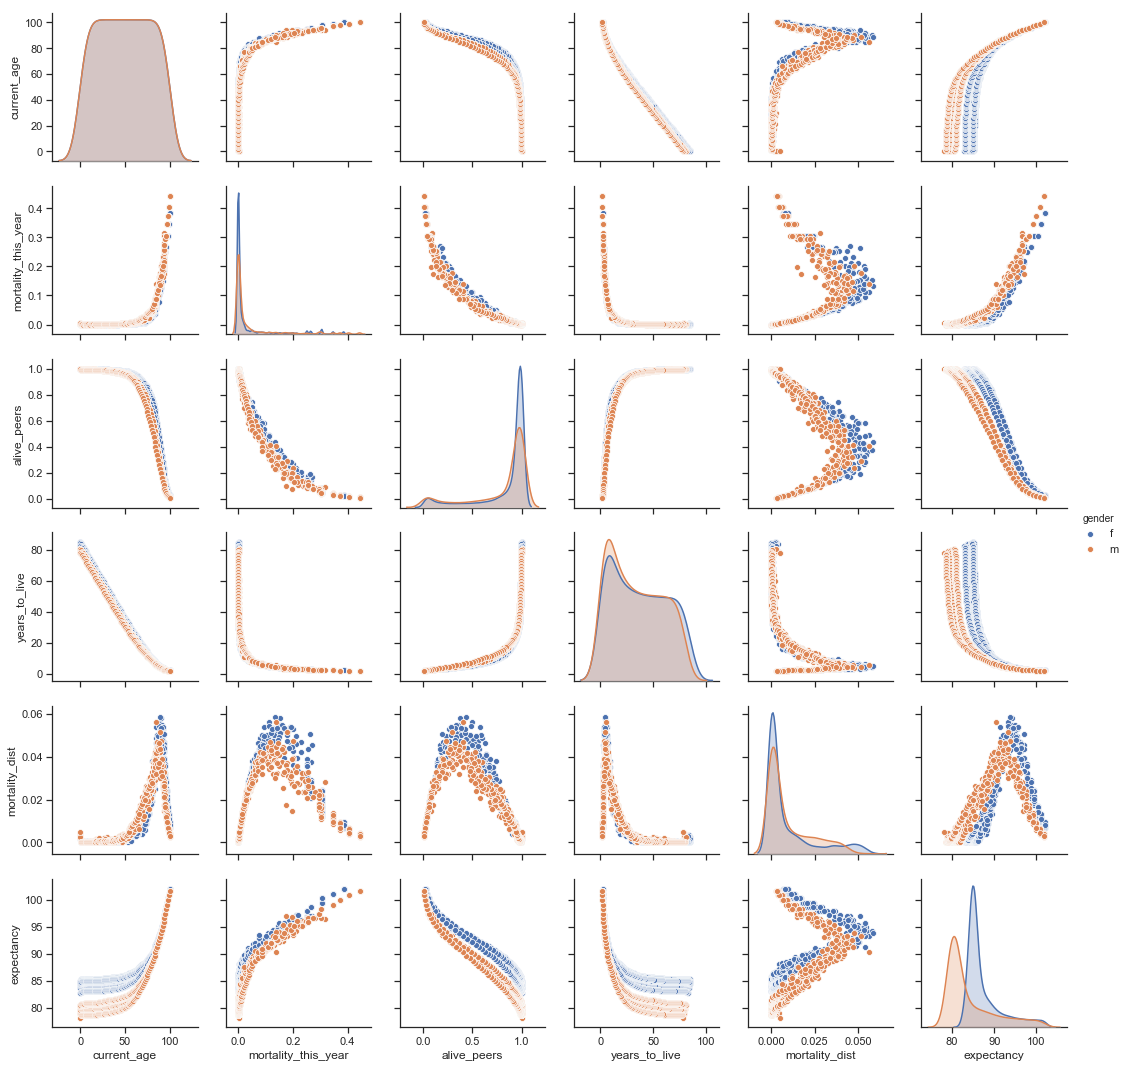

In [10]:
sns.set(style="ticks")
sns.pairplot(df, hue="gender")

### Mortality Distribution
beschreiben

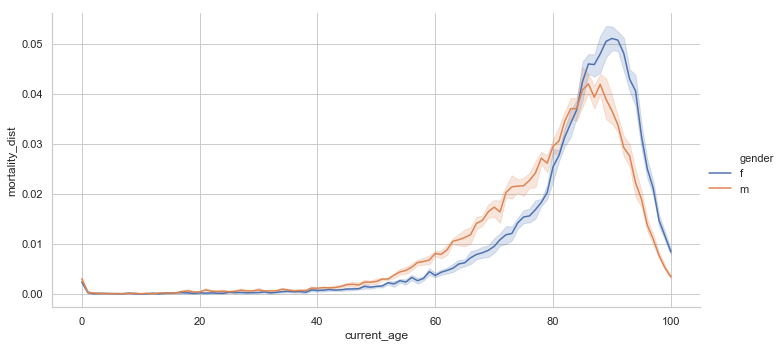

In [11]:
sns.set(style="whitegrid")
sns.relplot(x='current_age', y='mortality_dist', data=df, kind='line', hue='gender', alpha=1, aspect=2)

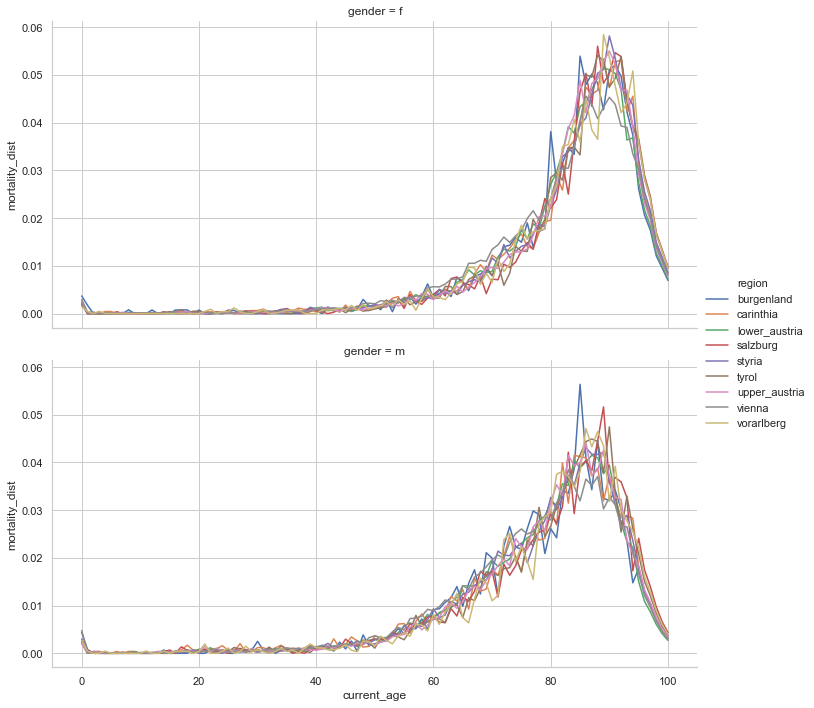

In [12]:
sns.relplot(x='current_age', y='mortality_dist', data=df, kind='line', hue='region', row='gender', alpha=1, aspect=2)

In [13]:
median = df.groupby(["region"])['expectancy'].aggregate(np.median).reset_index().sort_values('expectancy')
median

,region,expectancy
7,vienna,83.284580
2,lower_austria,84.166161
0,burgenland,84.469514
1,carinthia,84.620882
6,upper_austria,84.876366
4,styria,84.884765
8,vorarlberg,85.153971
5,tyrol,85.467511
3,salzburg,85.511621


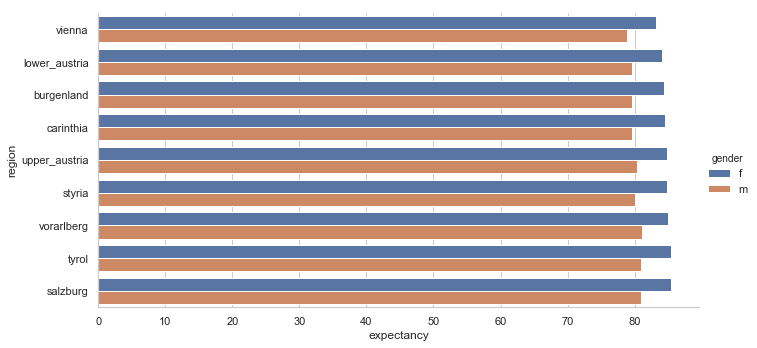

In [23]:
sns.catplot('expectancy', 'region', data=df[df.current_age==25], hue='gender', kind='bar', aspect=2, order=median['region'])

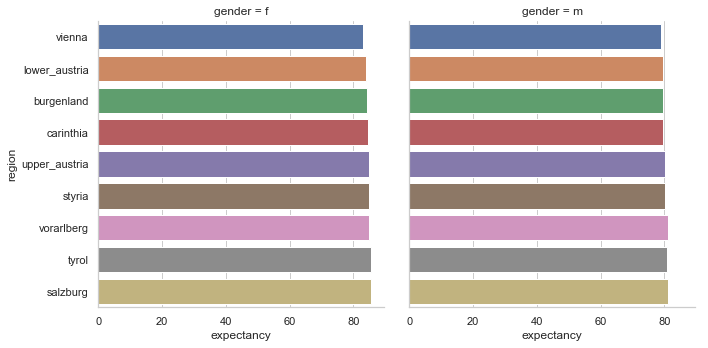

In [25]:
sns.catplot('expectancy', 'region', data=df[df.current_age==25], col='gender', kind='bar', aspect=1, order=median['region'])

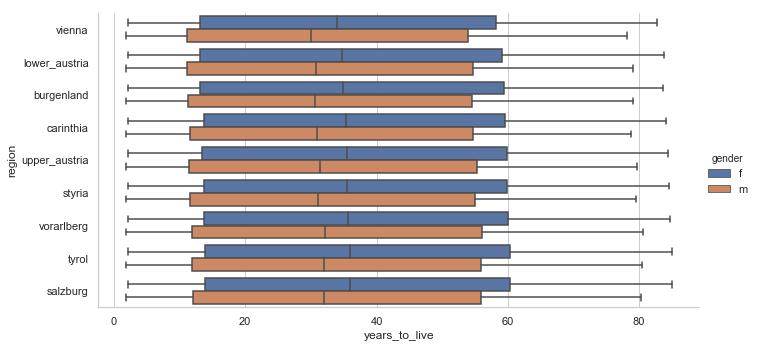

In [26]:
sns.catplot('years_to_live', 'region', data=df, kind='box', hue='gender', aspect=2, order=median['region'])

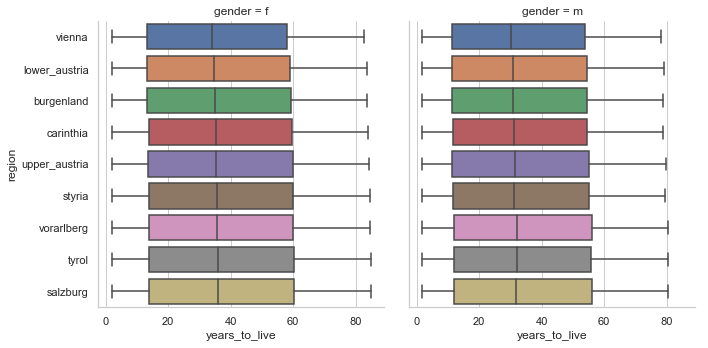

In [17]:
sns.catplot('years_to_live', 'region', data=df, kind='box', col='gender', order=median['region'])

## 7. Interact

In [18]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

In [19]:
output_notebook()

Loading BokehJS ...

In [20]:
from bokeh.models import CategoricalColorMapper
from bokeh.models import HoverTool

from bokeh.io import curdoc
from bokeh.layouts import row, column, widgetbox
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.plotting import figure

from bokeh.palettes import Category10_9

In [27]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnarDataSource, Slider, CustomJS
from bokeh.plotting import figure
output_notebook()

genders = df.gender.unique().to_list()
color_mapper = CategoricalColorMapper(factors=genders, palette=['#CC8963', '#5975A4'])

regions = median.region.tolist() # the ordered list from above
genders = df.gender.unique().to_list()
age = 25

source = ColumnDataSource(data={'x': df.region[df.current_age==age],
                                'y': df.expectancy[df.current_age==age],
                                'region': df.region[df.current_age==age],
                                'gender': df.gender[df.current_age==age],
                                'age': df.current_age[df.current_age==age],
                                'alive_peers': df.alive_peers[df.current_age==age]
                               })

hover = HoverTool(
    tooltips=[
        ('age', '@age'),
        ('expectancy', '@y'),
        ('region', '@x'),
        ('gender', '@gender'),
        ('alive peers', '@alive_peers')
        
        ])


p = figure(title="simple circle example", plot_height=300, plot_width=800, y_range=(75,105), x_range=regions,
           background_fill_color='#FFFFFF', tools=[hover, 'pan', 'wheel_zoom'])
r = p.circle('x', 'y', size=20, alpha=0.6, color=dict(field='gender', transform=color_mapper), source=source)

def update(age=25):
    #r.data_source.data['x'] = age
    r.data_source.data['y'] = df.expectancy[df.current_age==age]
    r.data_source.data['age'] = df.current_age[df.current_age==age]
    r.data_source.data['alive_peers'] = df.alive_peers[df.current_age==age]
    push_notebook()

show(p, notebook_handle=True)

interact(update, age=(0,100))

Loading BokehJS ...

interactive(children=(IntSlider(value=25, description='age'), Output()), _dom_classes=('widget-interact',))

<function __main__.update(age=25)>

### Again blue circles represent women and orange circles men.

It may seem somewhat contradictory that life expectancy is higher for older people than for young people. However, one must remember that someone who is 25 years old must be the same age as someone who is 80 before they can get any older.

As you glide over the circles, you will see additional information such as the exact life expectancy (*expectancy*) or the number of living people of the same age (*alive_peers*).